

# Objective
The goal of this data analysis project using sql would be to identify opportunities to increase the occupancy rate on low-performing flights, which can ultimately lead to increased profitability for the airline.


# Importing Libraries

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Database Connection

In [2]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [3]:
# extracting table names from the database
cursor.execute("""SELECT name FROM sqlite_master WHERE type='table';""")
print('List of Tables present in the Database')
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of Tables present in the Database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

# Data Exploration

In [4]:
aircrafts_data = pd.read_sql_query(f"""SELECT * FROM aircrafts_data""", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [5]:
airports_data = pd.read_sql_query(f"""SELECT * FROM airports_data""", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [6]:
boarding_passes = pd.read_sql_query(f"""SELECT * FROM boarding_passes""", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [7]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings """, connection)
bookings.head()

,book_ref,book_date,total_amount
0,00000F,2017-07-05 03:12:00+03,265700
1,000012,2017-07-14 09:02:00+03,37900
2,000068,2017-08-15 14:27:00+03,18100
3,000181,2017-08-10 13:28:00+03,131800
4,0002D8,2017-08-07 21:40:00+03,23600


In [8]:
flights = pd.read_sql_query(f"""SELECT * FROM flights  """, connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [67]:
pd.read_sql_query("""SELECT COUNT(*) AS numbers, status FROM flights
                    GROUP BY status""", connection)

,numbers,status
0,16707,Arrived
1,414,Cancelled
2,41,Delayed
3,58,Departed
4,518,On Time
5,15383,Scheduled


In [9]:
seats = pd.read_sql_query(f"""SELECT * FROM seats""", connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [10]:
ticket_flights = pd.read_sql_query(f"""SELECT * FROM ticket_flights  """, connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [11]:
tickets = pd.read_sql_query(f"""SELECT * FROM tickets  """, connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [12]:
for table in table_list:
    print("\ntable: " + table)
    columns_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in columns_info.fetchall():
        print(column[1:3])


table: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table: seats
('aircraft_code', 'character(3)')
('seat_no', 'character varying(4

# Data Cleaning

In [13]:
# checking for missing values in each column for every table
for table in table_list:
    print(f'\nMissing Values in table {table}')
    df_table = pd.read_sql_query(f"""SELECT * FROM {table}""", connection)
    print(df_table.isnull().sum())
    


Missing Values in table aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Missing Values in table airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Missing Values in table boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Missing Values in table bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Missing Values in table flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Missing Values in table seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Missing Values in table ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             

There are no missing values in the datasets.

# Basic Analysis 

**How many aircraft models are there in the database?**

In [14]:
pd.read_sql_query(f"""SELECT COUNT(DISTINCT model) AS No_of_models
                    FROM aircrafts_data""", connection)

,No_of_models
0,9


**Which airports are included in the database?**

In [15]:
pd.read_sql_query(f"""SELECT distinct(airport_code), airport_name, city
                    FROM airports_data""",connection)

,airport_code,airport_name,city
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}"
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}"
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}"
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К..."
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали..."
...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}"
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}"
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}"
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}"


**What is the total number of bookings made?**

In [16]:
pd.read_sql_query("""SELECT COUNT(*) AS total_bookings
                    FROM bookings""", connection)

,total_bookings
0,262788


**Count of total number of flights grouped by their status**

In [68]:
pd.read_sql_query("""SELECT COUNT(*) AS numbers, status FROM flights
                    GROUP BY status""", connection)

,numbers,status
0,16707,Arrived
1,414,Cancelled
2,41,Delayed
3,58,Departed
4,518,On Time
5,15383,Scheduled


**What is the total revenue and average revenue on all aircraft?**

In [23]:
pd.read_sql_query("""SELECT SUM(total_amount) AS total_spent,
                    AVG(total_amount) AS avg_spent
                    FROM bookings""", connection)

,total_spent,avg_spent
0,20766980900,79025.605812


**How many seats are available in each aircraft?**

In [19]:
pd.read_sql_query("""SELECT aircraft_code, COUNT(*) AS num_seats
                    FROM seats
                    GROUP BY aircraft_code""", connection)

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402
6,CN1,12
7,CR2,50
8,SU9,97


**How many planes have more than 100 seats?**

In [43]:
seats_per_model = pd.read_sql_query(f"""SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                        GROUP BY aircraft_code 
                        HAVING num_seats > 100 
                        ORDER BY num_seats DESC""", connection)
seats_per_model

,aircraft_code,num_seats
0,773,402
1,763,222
2,321,170
3,320,140
4,733,130
5,319,116


**What is the total revenue and average revenue on each aircraft model**

In [26]:
pd.read_sql_query("""SELECT ad.model AS aircraft_model,
                      SUM(tf.amount) AS total_revenue,
                      AVG(tf.amount) AS average_revenue
                        FROM aircrafts_data ad
                        JOIN
                        flights f ON ad.aircraft_code = f.aircraft_code
                        JOIN
                        ticket_flights tf ON f.flight_id = tf.flight_id
                        GROUP BY ad.model
                        ORDER BY total_revenue DESC""", connection)

,aircraft_model,total_revenue,average_revenue
0,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",5114484700,13985.541895
1,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",4371277100,35033.557472
2,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",3431205500,23765.760930
3,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",2706163100,51201.693376
4,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",1982760500,13207.661102
5,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",1638164100,15291.509302
6,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",1426552100,16568.164503
7,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",96373800,6568.552345


**What is the revenue per seat for each aircraft model?**

In [32]:
pd.read_sql_query("""SELECT
  ad.model AS aircraft_model,
  SUM(tf.amount) / COUNT(s.seat_no) AS revenue_per_seat
FROM
  aircrafts_data ad
JOIN
  flights f ON ad.aircraft_code = f.aircraft_code
JOIN
  seats s ON f.aircraft_code = s.aircraft_code
JOIN
  ticket_flights tf ON f.flight_id = tf.flight_id
GROUP BY
  ad.model
ORDER BY
 revenue_per_seat DESC""", connection)

,aircraft_model,revenue_per_seat
0,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",51201
1,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",15291
2,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",16568
3,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",35033
4,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",23765
5,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",13207
6,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",6568
7,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",13985


# Graph Analysis 

**Number of seats by Aircraft Model**

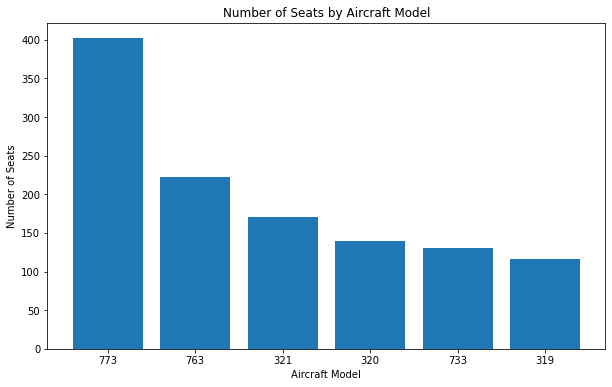

In [53]:
plt.figure(figsize = (10,6))
plt.bar(seats_per_model['aircraft_code'], seats_per_model['num_seats'])
plt.xlabel('Aircraft Model')
plt.ylabel('Number of Seats')
plt.title('Number of Seats by Aircraft Model')
plt.show()

**How the fare Conditions are distributed according to total revanue and their number of bookings**

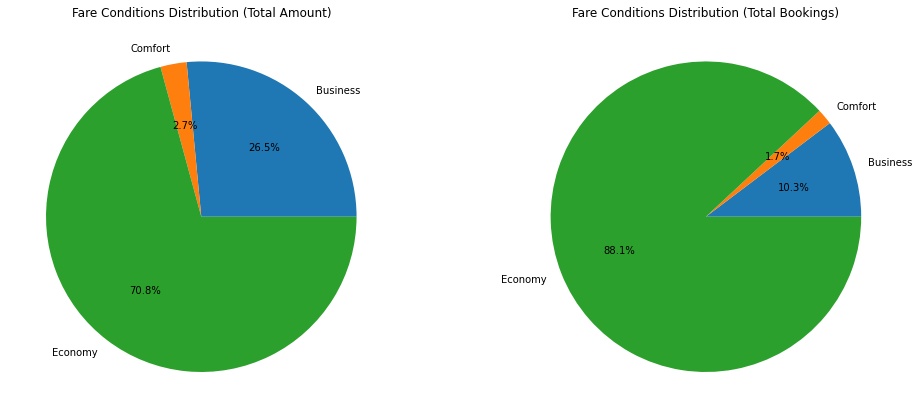

In [64]:
fare_condition_revenue = pd.read_sql_query("""SELECT fare_conditions, SUM(amount) AS total_amount,
                                            COUNT(*) AS total_bookings FROM ticket_flights
                                            GROUP BY fare_conditions""", connection)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.pie(fare_condition_revenue['total_amount'], labels=fare_condition_revenue['fare_conditions'], autopct='%1.1f%%')
ax1.set_title('Fare Conditions Distribution (Total Amount)')
ax2.pie(fare_condition_revenue['total_bookings'], labels=fare_condition_revenue['fare_conditions'], autopct='%1.1f%%')
ax2.set_title('Fare Conditions Distribution (Total Bookings)')
plt.subplots_adjust(wspace=0.3)
plt.show()

**Calculate the average charges for each aircraft with different fare conditions.**

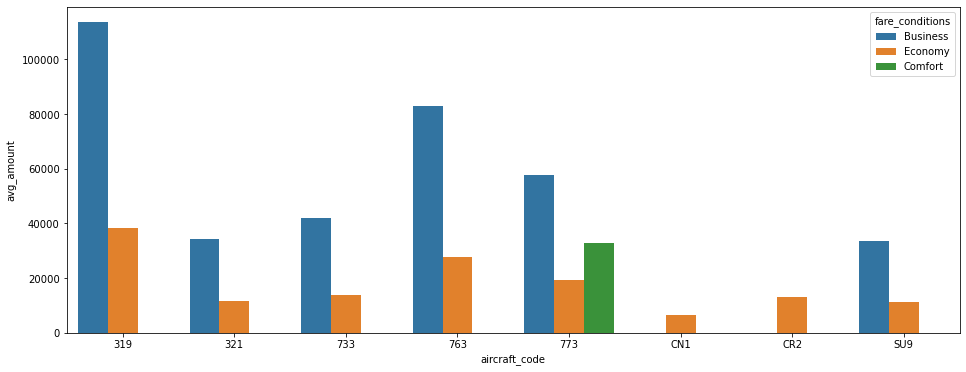

In [54]:
df = pd.read_sql_query(f"""SELECT fare_conditions, aircraft_code, AVG(amount) as avg_amount FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code, fare_conditions""", connection)

plt.figure(figsize = (16,6))
sns.barplot(data = df, x = 'aircraft_code', y ='avg_amount', hue = 'fare_conditions');

**How the number of tickets booked and total amount earned changed with the time.**

In [34]:
tickets = pd.read_sql_query(f"""SELECT *
                                    FROM tickets
                                    INNER JOIN bookings 
                                    ON tickets.book_ref=bookings.book_ref;""", connection)
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03,219400


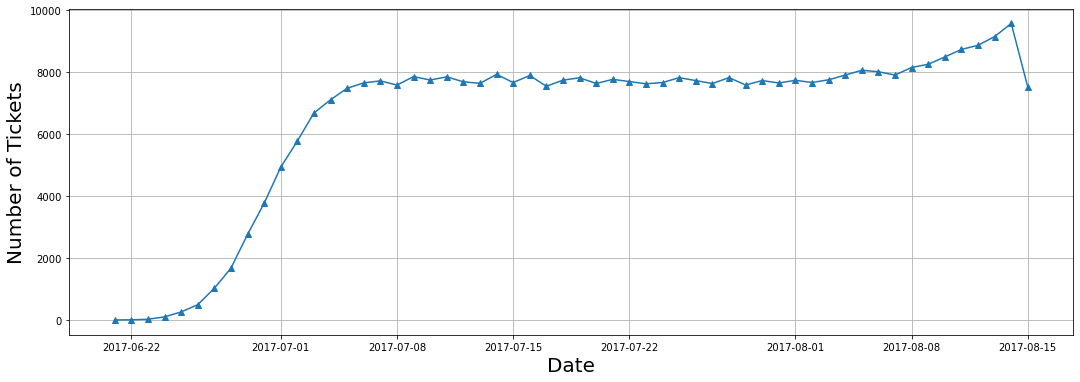

In [35]:
tickets['book_date'] = pd.to_datetime(tickets['book_date'])
tickets['date'] = tickets['book_date'].dt.date
x =  tickets.groupby('date')[['date']].count()
plt.figure(figsize = (18,6))
plt.plot(x.index,x['date'], marker = '^')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Number of Tickets', fontsize = 20)
plt.grid('b')
plt.show()

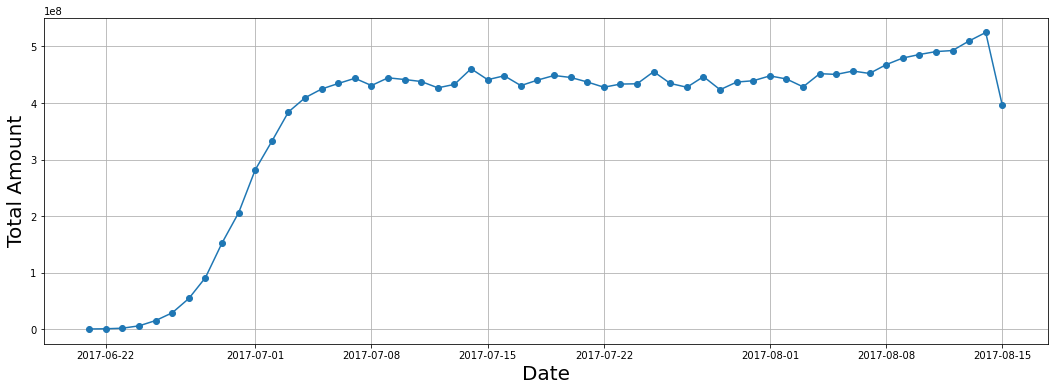

In [36]:
bookings = pd.read_sql_query(f"""SELECT * FROM bookings""", connection)
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
y =  bookings.groupby('date')[['total_amount']].sum()
plt.figure(figsize = (18,6))
plt.plot(y.index,y['total_amount'], marker = 'o')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Total Amount', fontsize = 20)
plt.grid('b')
plt.show()

# Analyzing occupancy rate

**What are the total revenue per year and the average revenue per ticket for each aircraft.**

In [69]:
pd.set_option('display.float_format', str)

In [70]:
pd.read_sql_query(f"""SELECT aircraft_code, total_revenue, ticket_count, total_revenue/ticket_count as avg_revenue_per_ticket
                        FROM 
                        (SELECT aircraft_code, COUNT(*) as ticket_count, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code)""", connection)

,aircraft_code,total_revenue,ticket_count,avg_revenue_per_ticket
0,319,2706163100,52853,51201
1,321,1638164100,107129,15291
2,733,1426552100,86102,16568
3,763,4371277100,124774,35033
4,773,3431205500,144376,23765
5,CN1,96373800,14672,6568
6,CR2,1982760500,150122,13207
7,SU9,5114484700,365698,13985


**Calculate the average occupancy per aircraft.**

In [84]:
occupancy_rate = pd.read_sql_query(f"""SELECT a.aircraft_code, AVG(a.seats_count) as booked_seats, b.num_seats, 
ROUND(AVG(a.seats_count)/b.num_seats,4) as occupancy_rate
                            FROM (
                                SELECT aircraft_code, flights.flight_id, COUNT(*) as seats_count
                                FROM boarding_passes
                                INNER JOIN flights 
                                ON boarding_passes.flight_id=flights.flight_id
                                GROUP BY aircraft_code, flights.flight_id
                                ) as a INNER JOIN
                                (
                                SELECT aircraft_code, COUNT(*) as num_seats FROM seats 
                                GROUP BY aircraft_code  
                                ) as b
                                ON a.aircraft_code = b.aircraft_code
                            GROUP BY a.aircraft_code""", connection)
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.58318098720292,116,0.4619
1,321,88.80923076923077,170,0.5224
2,733,80.25546218487395,130,0.6173
3,763,113.93729372937294,222,0.5132
4,773,264.9258064516129,402,0.659
5,CN1,6.004431314623338,12,0.5004
6,CR2,21.48284690220174,50,0.4297
7,SU9,56.81211267605634,97,0.5857


**How much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.**


In [85]:
occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate'] + occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.58318098720292,116,0.4619,0.5080899999999999
1,321,88.80923076923077,170,0.5224,0.5746399999999999
2,733,80.25546218487395,130,0.6173,0.6790299999999999
3,763,113.93729372937294,222,0.5132,0.56452
4,773,264.9258064516129,402,0.659,0.7249
5,CN1,6.004431314623338,12,0.5004,0.5504399999999999
6,CR2,21.48284690220174,50,0.4297,0.47267000000000003
7,SU9,56.81211267605634,97,0.5857,0.64427


In [86]:
total_revenue = pd.read_sql_query("""SELECT aircraft_code, SUM(amount) as total_revenue  FROM ticket_flights
                        JOIN flights 
                        ON ticket_flights.flight_id=flights.flight_id 
                        GROUP BY aircraft_code""", connection)

occupancy_rate['Inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc occupancy rate']
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.4619,0.5080899999999999,2976779409.9999995
1,321,88.80923076923077,170,0.5224,0.5746399999999999,1801980509.9999998
2,733,80.25546218487395,130,0.6173,0.6790299999999999,1569207309.9999998
3,763,113.93729372937294,222,0.5132,0.56452,4808404810.0
4,773,264.9258064516129,402,0.659,0.7249,3774326050.0
5,CN1,6.004431314623338,12,0.5004,0.5504399999999999,106011179.99999999
6,CR2,21.48284690220174,50,0.4297,0.47267000000000003,2181036550.0
7,SU9,56.81211267605634,97,0.5857,0.64427,5625933170.0
